# Analysis on the winners of the DPOY award
## Exploring and creating the necessary dataframe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

First of all let's see the data containing information about the winners, save the important data and save the year when the DPOY started to be awarded.

In [2]:
df_player_awards = pd.read_csv('awards.csv')
df_player_awards.head()

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,seas_id,player_id
0,2022,dpoy,Marcus Smart,27,BOS,37.0,257.0,500.0,0.514,True,30183,4275
1,2022,dpoy,Mikal Bridges,25,PHO,22.0,202.0,500.0,0.404,False,30205,4658
2,2022,dpoy,Rudy Gobert,29,UTA,12.0,136.0,500.0,0.272,False,30313,4199
3,2022,dpoy,Bam Adebayo,24,MIA,13.0,128.0,500.0,0.256,False,29689,4472
4,2022,dpoy,Jaren Jackson Jr.,22,MEM,10.0,99.0,500.0,0.198,False,29991,4632


In [70]:
df_dpoy = df_player_awards.loc[(df_player_awards['award']=='dpoy') & (df_player_awards['winner']), ['seas_id', 'player_id']]
first_season = df_dpoy['seas_id'].min()

After this we can import the data containing the performances of players. We will use the performance per 100 posessions, because it helps us the most when comparing players from different time periods. We need only the data from that very first season.

In [4]:
df_per_100 = pd.read_csv('per100poss.csv')
df_per_100 = df_per_100[df_per_100['seas_id'] >= first_season]
df_per_100.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
0,30458,2023,5025,A.J. Green,NaN,SG,23,1,NBA,MIL,...,4.2,5.8,2.7,0.5,0.0,1.1,8.0,23.9,141.0,115.0
1,30459,2023,5026,A.J. Lawson,NaN,SG,22,1,NBA,TOT,...,16.0,16.0,0.0,0.0,0.0,0.0,16.0,32.1,74.0,111.0
2,30460,2023,5026,A.J. Lawson,NaN,SG,22,1,NBA,MIN,...,23.6,23.6,0.0,0.0,0.0,0.0,23.6,47.2,200.0,106.0
3,30461,2023,5026,A.J. Lawson,NaN,SG,22,1,NBA,DAL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0
4,30462,2023,4219,Aaron Gordon,NaN,PF,27,9,NBA,DEN,...,6.9,10.7,3.5,1.5,1.2,2.6,2.9,27.9,127.0,115.0


Now we can expand this dataframe with a column that indicates the DPOY winners.

In [73]:
df_dpoy['dpoy'] = 1

In [74]:
pd.concat([df_dpoy, df_per_100], axis=1)

,seas_id,player_id,dpoy,seas_id,season,player_id,player,birth_year,pos,age,...,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg,dpoy
0,30183.0,4275.0,1.0,30458,2023,5025,A.J. Green,NaN,SG,23,...,5.8,2.7,0.5,0.0,1.1,8.0,23.9,141.0,115.0,0
1,NaN,NaN,NaN,30459,2023,5026,A.J. Lawson,NaN,SG,22,...,16.0,0.0,0.0,0.0,0.0,16.0,32.1,74.0,111.0,0
2,NaN,NaN,NaN,30460,2023,5026,A.J. Lawson,NaN,SG,22,...,23.6,0.0,0.0,0.0,0.0,23.6,47.2,200.0,106.0,0
3,NaN,NaN,NaN,30461,2023,5026,A.J. Lawson,NaN,SG,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,0
4,NaN,NaN,NaN,30462,2023,4219,Aaron Gordon,NaN,PF,27,...,10.7,3.5,1.5,1.2,2.6,2.9,27.9,127.0,115.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21862,NaN,NaN,NaN,9470,1983,1842,Wayne Cooper,NaN,C,26,...,13.8,2.6,0.6,3.1,3.7,7.2,17.6,97.0,102.0,0
21863,NaN,NaN,NaN,9471,1983,1974,Wes Matthews,NaN,PG,23,...,3.7,10.2,2.5,0.3,5.0,5.3,18.1,93.0,105.0,0
21864,NaN,NaN,NaN,9472,1983,1691,World B. Free,NaN,SG,29,...,3.7,5.3,1.8,0.3,3.8,4.4,31.9,106.0,110.0,0
21865,NaN,NaN,NaN,9473,1983,1691,World B. Free,NaN,SG,29,...,2.9,5.9,1.0,0.2,3.3,4.4,28.6,106.0,113.0,0


In [6]:
df_extremes = df_dpoy[df_dpoy['age'] == df_dpoy['age'].min()]
df_extremes = df_extremes.append(df_dpoy[df_dpoy['age'] == df_dpoy['age'].max()])
df_extremes = df_extremes.append(df_dpoy[df_dpoy['gs'] == df_dpoy['gs'].min()])

In [7]:
df_extremes

,seas_id,player_id,dpoy,season,player,birth_year,pos,age,experience,lg,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
7,25447,4032,1,2015,Kawhi Leonard,NaN,SF,23,4,NBA,...,9.5,11.6,4.1,3.7,1.2,2.4,3.2,26.6,113.0,96.0
13,21759,3520,1,2009,Dwight Howard,NaN,C,23,5,NBA,...,13.9,20.1,2.1,1.4,4.3,4.4,5.0,29.9,113.0,95.0
36,10190,2158,1,1986,Alvin Robertson,NaN,SG,23,2,NBA,...,5.3,8.3,7.2,4.8,0.6,4.1,4.8,22.4,109.0,103.0
21,17363,2648,1,2001,Dikembe Mutombo,NaN,C,34,10,NBA,...,14.3,20.6,1.5,0.6,4.1,2.9,4.1,15.2,108.0,97.0
35,10811,1823,1,1987,Michael Cooper,NaN,SG,30,9,NBA,...,4.1,5.3,7.8,1.6,0.9,2.1,4.2,18.0,117.0,108.0


In [8]:
df_dpoy_box_score = df_dpoy[['season', 'player', 'pos', 'age', 'experience', 'tm', 'g', 'gs',
                                          'pts_per_100_poss', 'trb_per_100_poss', 'ast_per_100_poss', 'stl_per_100_poss',
                                          'blk_per_100_poss', 'tov_per_100_poss', 'pf_per_100_poss']]
df_dpoy_box_score

,season,player,pos,age,experience,tm,g,gs,pts_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss
0,2022,Marcus Smart,PG,27,8,BOS,71,71.0,18.6,5.8,9.0,2.6,0.4,3.4,3.5
1,2021,Rudy Gobert,C,28,8,UTA,71,71.0,22.6,21.4,2.0,0.9,4.2,2.6,3.6
2,2020,Giannis Antetokounmpo,PF,25,7,MIL,63,63.0,44.2,20.4,8.4,1.5,1.6,5.5,4.6
3,2019,Rudy Gobert,C,26,6,UTA,81,80.0,23.8,19.3,3.0,1.2,3.5,2.4,4.3
4,2018,Rudy Gobert,C,25,5,UTA,56,56.0,20.9,16.6,2.2,1.2,3.6,3.0,4.2
5,2017,Draymond Green,PF,26,5,GSW,76,76.0,15.1,11.7,10.4,3.0,2.1,3.6,4.2
6,2016,Kawhi Leonard,SF,24,5,SAS,72,72.0,32.8,10.6,4.0,2.8,1.5,2.3,2.9
7,2015,Kawhi Leonard,SF,23,4,SAS,64,64.0,26.6,11.6,4.1,3.7,1.2,2.4,3.2
8,2014,Joakim Noah,C,28,7,CHI,80,80.0,19.0,17.0,8.1,1.9,2.3,3.7,4.6
9,2013,Marc Gasol,C,28,5,MEM,80,80.0,21.9,12.1,6.2,1.6,2.7,3.0,5.0


In [9]:
df_dpoy_box_score['times_won'] = df_dpoy_box_score['player'].map(dict(df_dpoy_box_score['player'].value_counts()))

<ipython-input-9-1c3320c42974>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dpoy_box_score['times_won'] = df_dpoy_box_score['player'].map(dict(df_dpoy_box_score['player'].value_counts()))


Now let's explore our data starting with some visualizing:

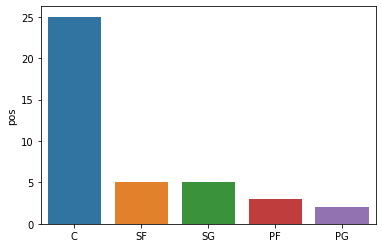

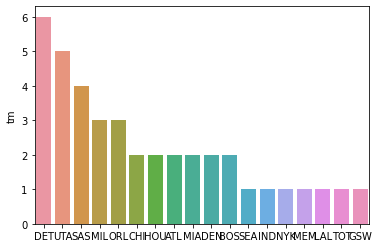

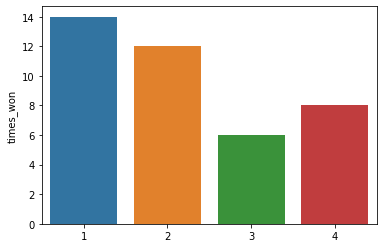

In [10]:
categorical_variables = ['pos', 'tm', 'times_won']
for variable in categorical_variables:
    value_counts = df_dpoy_box_score[variable].value_counts()
    chart = sns.barplot(x=value_counts.index,y=value_counts)
    plt.show()

In [11]:
df_dpoy_box_score_sum = df_dpoy_box_score[['season', 'player']]
df_dpoy_box_score_sum['p+r+a'] = df_dpoy_box_score[['pts_per_100_poss', 'trb_per_100_poss', 'ast_per_100_poss']].sum(axis=1)

<ipython-input-11-e731c522e84d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dpoy_box_score_sum['p+r+a'] = df_dpoy_box_score[['pts_per_100_poss', 'trb_per_100_poss', 'ast_per_100_poss']].sum(axis=1)


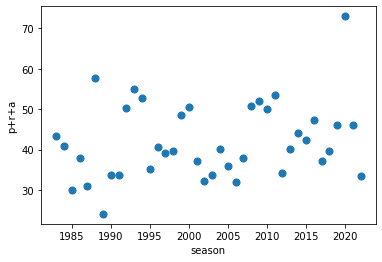

In [14]:
df_dpoy_box_score_sum.plot.scatter(x = 'season', y = 'p+r+a', s = 50);